## **Presented By:** 
### - Azzouzi Ousssama Abderraouf

# 1- Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
# from keras import layers
# from keras import models
# from keras import optimizers
# from keras import losses
# from keras import metrics
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

# 2- loading datasets

In [2]:
df = pd.read_csv('simulation_data_1000.csv')
df.head()

,e,e_1,e_2,e_3,theta,ref,torque
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003042,0.000000,0.000000,0.000000,0.001081,0.004123,6.541053
2,0.003875,0.003042,0.000000,0.000000,0.004371,0.008246,2.246437
3,0.004161,0.003875,0.003042,0.000000,0.008207,0.012368,1.195672
4,0.004246,0.004161,0.003875,0.003042,0.012243,0.016489,0.807004


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001000 entries, 0 to 1000999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   e       1001000 non-null  float64
 1   e_1     1001000 non-null  float64
 2   e_2     1001000 non-null  float64
 3   e_3     1001000 non-null  float64
 4   theta   1001000 non-null  float64
 5   ref     1001000 non-null  float64
 6   torque  1001000 non-null  float64
dtypes: float64(7)
memory usage: 53.5 MB


# 3- Data Preprocessing

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
e,1001000.0,0.002758,0.024460,-0.067246,-0.011763,0.002230,0.017451,0.089035
e_1,1001000.0,0.002756,0.024449,-0.067246,-0.011740,0.002212,0.017434,0.089035
e_2,1001000.0,0.002754,0.024437,-0.067246,-0.011720,0.002193,0.017412,0.089035
e_3,1001000.0,0.002752,0.024425,-0.067246,-0.011698,0.002175,0.017390,0.089035
theta,1001000.0,0.047937,0.617453,-1.543894,-0.315264,0.040661,0.431309,1.543903
ref,1001000.0,0.050695,0.639438,-1.569760,-0.328445,0.043661,0.450121,1.569756
torque,1001000.0,0.417424,4.275082,-10.118170,-2.041263,0.340463,2.841374,147.890634


In [28]:
import numpy as np

def create_sequences(values, sequence_length):
    X, y = [], []
    for i in range(len(values) - sequence_length):
        X.append(values[i:(i + sequence_length), :-1])  # Features
        y.append(values[i + sequence_length, -1])  # Target value
    return np.array(X), np.array(y)

# Example data
data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data_test2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

re=pd.DataFrame({'d1':data_test,
                #  'd2':data_test2,
                  't': target})

print('data_test:', data_test)
print('data_test2:', data_test2)
print('target:', target)
# mat = np.column_stack((data, target))

# Create sequences
sequence_length = 3
x1,y1 = create_sequences(re.to_numpy(), 3)

print("Input Sequences:")
print(x1.shape)
# for sequence in x1:
#     print(sequence)

print("Target Values:")
print(y1)
re.head()

data_test: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data_test2: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
Input Sequences:
(7, 3, 1)
Target Values:
[104 105 106 107 108 109 110]


,d1,t
0,1,101
1,2,102
2,3,103
3,4,104
4,5,105


# 4- Feature Selection

In [498]:
# normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_nr = scaler.fit_transform(df)

# target_column = df.columns.get_loc("torque")
df_nr = pd.DataFrame(df_nr, columns=df.columns)

In [499]:
target = df['torque']

# features to drop
# redundant_features = ['torque', 'e_1', 'e_2', 'e_3']

features = df.drop(columns='torque')

# features= scaler.fit_transform(features)

features.shape, target.shape

((1001000, 6), (1001000,))

In [484]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
tar = scaler2.fit_transform(target.values.reshape(-1, 1))
# tar = tar.reshape(-1)
# tar = tar.flatten()
tar.shape
# scaler2.inverse_transform(tar)


(1001000, 1)

In [312]:
# converting my data to numpy array
df_np = df.to_numpy()
features_np = features
target_np = target.to_numpy()
# spliting data_np to two arrays using a new function 
print(df_np.shape)
print(features_np.shape)
print(target_np.shape)
vector1 = df_np[:, 0]  # All rows, first column
vector2 = df_np[:, 1]  # All rows, second column
print(vector1)
print(vector2)

(1001000, 7)
(1001000, 6)
(1001000,)
[0.         0.00304235 0.00387495 ... 0.00360643 0.00423504 0.00486096]
[0.         0.         0.00304235 ... 0.00297582 0.00360643 0.00423504]


# 5- Data Splitting

In [325]:
x,y=create_sequences(df_nr.to_numpy(), 20)

# y.shape,x.shape

x.shape,y.shape

((1000980, 20, 6), (1000980,))

In [314]:
a,b = create_sequences(df_nr.to_numpy(), 10)
print(df.iloc[:,-1:].columns)
a.shape,b.shape

Index(['torque'], dtype='object')


((1000990, 10, 6), (1000990,))

In [315]:
x[0].shape

(10, 6)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((800792, 10, 6),
 (100099, 10, 6),
 (100099, 10, 6),
 (800792,),
 (100099,),
 (100099,))

In [317]:
y_train = y_train.reshape(y_train.shape[0],1).astype('float32')
y_test = y_test.reshape(y_test.shape[0],1).astype('float32')
y_val = y_val.reshape(y_val.shape[0],1).astype('float32')
np.shape(y_train), np.shape(y_test), np.shape(y_val)
y_val.shape

(100099, 1)

In [ ]:
x,y=create_sequences(df_nr.to_numpy(), 20)

# y.shape,x.shape

x.shape,y.shape

((1000980, 20, 6), (1000980,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((800792, 10, 6),
 (100099, 10, 6),
 (100099, 10, 6),
 (800792,),
 (100099,),
 (100099,))

In [ ]:
y_train = y_train.reshape(y_train.shape[0],1).astype('float32')
y_test = y_test.reshape(y_test.shape[0],1).astype('float32')
y_val = y_val.reshape(y_val.shape[0],1).astype('float32')
np.shape(y_train), np.shape(y_test), np.shape(y_val)
y_val.shape

(100099, 1)

In [454]:
# num_epochs =10
# batch_size=64
# sequence_length = X_train.shape[1]
# input_dim= X_train.shape[2]
# output_dim= 1
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, input_dim)))
# # model.add(BatchNormalization())
# # model.add(Dropout (0.2))
# model.add(LSTM(128, return_sequences=False, input_shape=(sequence_length, input_dim)))
# # model.add(BatchNormalization())
# # model.add(Dropout (0.2))
# # model.add(Dense(1))
# model.add((Dense (output_dim)))
# model.add(Activation("linear"))
# # es= EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
# model.compile(loss="mse", optimizer="adam", metrics=['mae', 'r2']) 
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val), shuffle=False)

import matplotlib.pyplot as plt

def plot_training_history(history, metric_name='mae'):
    """
    Plots the training and validation loss and a specified metric from the training history.

    Parameters:
    - history: Return value from model.fit() in Keras.
    - metric_name: The name of the metric to plot (e.g., 'mae' for Mean Absolute Error).
    """
    # Extract the history data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    epochs = range(1, len(loss) + 1)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    axs[0].plot(epochs, loss, 'b-', label='Train last value: {:.4f}'.format(loss[-1]))
    axs[0].plot(epochs, val_loss, 'orange', label='Test last value: {:.4f}'.format(val_loss[-1]))
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].grid(True)
    axs[0].legend()

    # Plot Metric
    axs[1].plot(epochs, metric, 'b-', label='Train last value: {:.4f}'.format(metric[-1]))
    axs[1].plot(epochs, val_metric, 'orange', label='Test last value: {:.4f}'.format(val_metric[-1]))
    axs[1].set_title(metric_name.capitalize())
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel(metric_name.capitalize())
    axs[1].grid(True)
    axs[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()



# 6 - Model Selection

# **6-a- LSTM Sliding_Window(10)**

In [322]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import time

num_epochs = 100  
batch_size = 128  
sequence_length = X_train.shape[1]
input_dim = X_train.shape[2]
output_dim = 1

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, input_dim)))  
# model.add(Dropout(0.2))  # Add dropout layer

model.add(LSTM(256, return_sequences=False))  
# model.add(Dropout(0.2))  # Add dropout layer

model.add(Dense(output_dim))
model.add(Activation("tanh"))  

# Adding early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', restore_best_weights=True)

optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer2 = tf.keras.optimizers.Adam(0.001)

model.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_152 (LSTM)             (None, 10, 128)           69120     
                                                                 
 lstm_153 (LSTM)             (None, 256)               394240    
                                                                 
 dense_75 (Dense)            (None, 1)                 257       
                                                                 
 activation_71 (Activation)  (None, 1)                 0         
                                                                 
Total params: 463,617
Trainable params: 463,617
Non-trainable params: 0
_________________________________________________________________


In [323]:
start = time.time()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[es], shuffle=False)
end = time.time()

Epoch 1/100
6257/6257 [==============================] - 71s 11ms/step - loss: 2.6810e-04 - mae: 0.0058 - val_loss: 1.4298e-04 - val_mae: 0.0055
Epoch 2/100
6257/6257 [==============================] - 67s 11ms/step - loss: 1.2394e-04 - mae: 0.0037 - val_loss: 1.1919e-04 - val_mae: 0.0049
Epoch 3/100
6257/6257 [==============================] - 67s 11ms/step - loss: 1.0753e-04 - mae: 0.0034 - val_loss: 9.7544e-05 - val_mae: 0.0044
Epoch 4/100
6257/6257 [==============================] - 67s 11ms/step - loss: 9.7578e-05 - mae: 0.0031 - val_loss: 9.4281e-05 - val_mae: 0.0045
Epoch 5/100
6257/6257 [==============================] - 67s 11ms/step - loss: 8.9669e-05 - mae: 0.0029 - val_loss: 9.4840e-05 - val_mae: 0.0046
Epoch 6/100
6257/6257 [==============================] - 67s 11ms/step - loss: 8.4494e-05 - mae: 0.0028 - val_loss: 9.2292e-05 - val_mae: 0.0045
Epoch 7/100
6257/6257 [==============================] - 67s 11ms/step - loss: 8.8773e-05 - mae: 0.0027 - val_loss: 8.2107e-05 - v

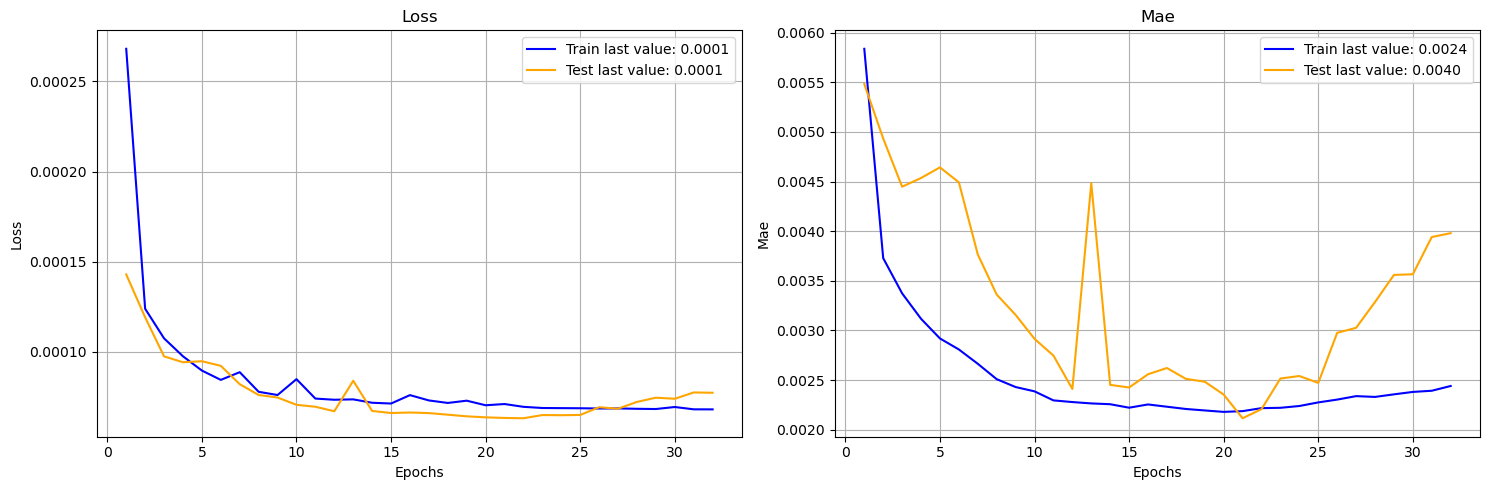

In [455]:
plot_training_history(history)

In [422]:
# Evaluating the model on the test data
loss = model.evaluate(X_test, y_test)

# Printing the loss (MSE, by default)
print(f"Mean Squared Error (MSE): {loss}")

# We can also calculate other metrics like MAE, RMSE, etc. if needed
# For example, if we want to calculate RMSE:
from sklearn.metrics import mean_squared_error
import math

y_pred = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('mse:', mean_squared_error(y_test, y_pred))

# calculate the model accuracy
# accuracy = 100 - (rmse * 100)
# print(f"Model Accuracy: {accuracy}")
print('r2 score:', r2_score(y_test, y_pred))
print('mean absolute error:', mean_absolute_error(y_test, y_pred))

3129/3129 [==============================] - 16s 5ms/step - loss: 6.9045e-05 - mae: 0.0022
Mean Squared Error (MSE): [6.904528709128499e-05, 0.00215385970659554]
3129/3129 [==============================] - 13s 4ms/step
Root Mean Squared Error (RMSE): 0.008309351129607862
mse: 6.9045316e-05
r2 score: 0.8958141719290127
mean absolute error: 0.0021538576


In [449]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [367]:
df2 = pd.read_csv('simulation_data.csv')

df2 = scaler.fit_transform(df2)
df2 = pd.DataFrame(df2, columns=df.columns)

In [368]:
u,v = create_sequences(df2.to_numpy(), 10)

In [369]:
los = model.evaluate(u, v)


print(f"Mean Squared Error (MSE): {los}")

y_pred2 = model.predict(u)
rmse2 = math.sqrt(mean_squared_error(v, y_pred2))
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print('mse:', mean_squared_error(v, y_pred2))
print('r2 score:', r2_score(v, y_pred2))

3128/3128 [==============================] - 20s 6ms/step - loss: 8.8107e-05 - mae: 0.0045
Mean Squared Error (MSE): [8.810673170955852e-05, 0.004531653132289648]
3128/3128 [==============================] - 13s 4ms/step
Root Mean Squared Error (RMSE): 0.009386521160831758
mse: 8.810677950274236e-05
r2 score: 0.8999854252602023


In [327]:
# saving the model
model.save('lstm_model2.h5')

# loading the model
from keras.models import load_model
# model = load_model('lstm_model2.h5')


# **6-b- LSTM Sliding_Window(20)**

In [328]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=0.5, shuffle=False)

X_train2.shape, X_test2.shape, X_val2.shape, y_train2.shape, y_test2.shape, y_val2.shape

((800784, 20, 6),
 (100098, 20, 6),
 (100098, 20, 6),
 (800784,),
 (100098,),
 (100098,))

In [329]:

y_train2 = y_train2.reshape(y_train2.shape[0],1).astype('float32')
y_test2 = y_test2.reshape(y_test2.shape[0],1).astype('float32')
y_val2 = y_val2.reshape(y_val2.shape[0],1).astype('float32')
np.shape(y_train2), np.shape(y_test2), np.shape(y_val2)
y_val2.shape


(100098, 1)

In [330]:

from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import time

num_epochs = 100  # Increase the number of epochs
batch_size = 128  # Decrease the batch size
sequence_length = X_train2.shape[1]
input_dim = X_train2.shape[2]
output_dim = 1

model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, input_dim)))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model2.add(LSTM(256, return_sequences=False))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model2.add(Dense(output_dim))
model2.add(Activation("tanh"))  # Change activation function

# Add early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', restore_best_weights=True)

optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer2 = tf.keras.optimizers.Adam(0.001)

model2.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
model2.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_154 (LSTM)             (None, 20, 128)           69120     
                                                                 
 lstm_155 (LSTM)             (None, 256)               394240    
                                                                 
 dense_76 (Dense)            (None, 1)                 257       
                                                                 
 activation_72 (Activation)  (None, 1)                 0         
                                                                 
Total params: 463,617
Trainable params: 463,617
Non-trainable params: 0
_________________________________________________________________


In [331]:
start2 = time.time()
history2 = model2.fit(X_train2, y_train2, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val2, y_val2), callbacks=[es], shuffle=False)
end2 = time.time()

Epoch 1/100
6257/6257 [==============================] - 87s 14ms/step - loss: 3.2067e-04 - mae: 0.0057 - val_loss: 1.2468e-04 - val_mae: 0.0049
Epoch 2/100
6257/6257 [==============================] - 83s 13ms/step - loss: 1.1326e-04 - mae: 0.0034 - val_loss: 1.0612e-04 - val_mae: 0.0046
Epoch 3/100
6257/6257 [==============================] - 84s 13ms/step - loss: 1.0067e-04 - mae: 0.0030 - val_loss: 1.1070e-04 - val_mae: 0.0056
Epoch 4/100
6257/6257 [==============================] - 85s 14ms/step - loss: 9.2584e-05 - mae: 0.0028 - val_loss: 1.0547e-04 - val_mae: 0.0055
Epoch 5/100
6257/6257 [==============================] - 87s 14ms/step - loss: 8.6869e-05 - mae: 0.0026 - val_loss: 1.0613e-04 - val_mae: 0.0058
Epoch 6/100
6257/6257 [==============================] - 87s 14ms/step - loss: 8.2822e-05 - mae: 0.0025 - val_loss: 1.6389e-04 - val_mae: 0.0091
Epoch 7/100
6257/6257 [==============================] - 87s 14ms/step - loss: 7.9796e-05 - mae: 0.0023 - val_loss: 1.2217e-04 - v

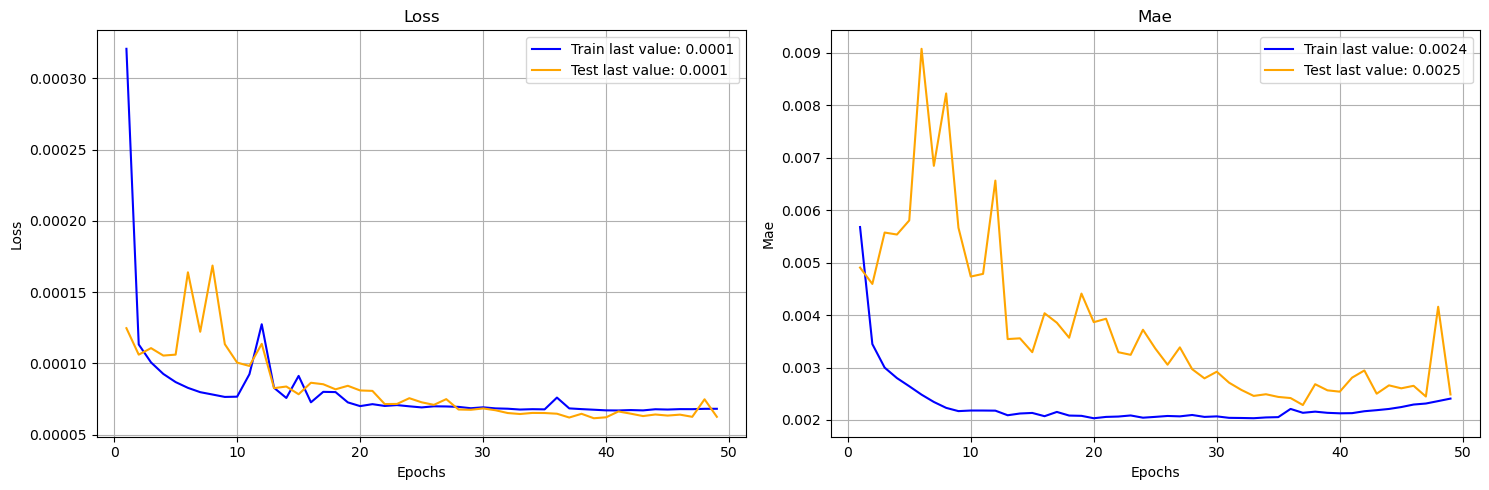

In [459]:
plot_training_history(history2)

In [332]:
model2.save('lstm_model3.h5')

In [393]:
# Evaluating the model on the test data
loss2 = model2.evaluate(X_test2, y_test2)

# Printing the loss (MSE, by default)
print(f"Mean Squared Error (MSE): {loss2}")

# We can also calculate other metrics like MAE, RMSE, etc. if needed
# For example, if we want to calculate RMSE:
from sklearn.metrics import mean_squared_error
import math

y_pred2 = model2.predict(X_test2)
rmse2 = math.sqrt(mean_squared_error(y_test2, y_pred2))
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print('mse:', mean_squared_error(y_test2, y_pred2))
print('r2 score:', r2_score(y_test2, y_pred2))
print('mean absolute error:', mean_absolute_error(y_test2, y_pred2))

3129/3129 [==============================] - 19s 6ms/step - loss: 6.9813e-05 - mae: 0.0025
Mean Squared Error (MSE): [6.981253682170063e-05, 0.002473694970831275]
3129/3129 [==============================] - 16s 5ms/step
Root Mean Squared Error (RMSE): 0.00835538750997897
mse: 6.98125e-05
r2 score: 0.8950710498924481
mean absolute error: 0.0024736975


In [379]:
u,v = create_sequences(df2.to_numpy(), 20)


In [380]:
y_pred2 = model2.predict(u)
rmse2 = math.sqrt(mean_squared_error(v, y_pred2))
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print('mse:', mean_squared_error(v, y_pred2))
print('mean absolute error:', mean_absolute_error(v, y_pred2))

print('r2 score:', r2_score(v, y_pred2))

3128/3128 [==============================] - 18s 5ms/step
Root Mean Squared Error (RMSE): 0.009038814207292481
mse: 8.17001622739524e-05
mean absolute error: 0.0037709867703708496
r2 score: 0.9072669243719813


# **6-c- LSTM Sliding_Window(30)**

In [344]:
x,y=create_sequences(df_nr.to_numpy(), 30)

# y.shape,x.shape

x.shape,y.shape

((1000970, 30, 6), (1000970,))

In [345]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.2, shuffle=False)

X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape


X_test3, X_val3, y_test3, y_val3 = train_test_split(X_test3, y_test3, test_size=0.5, shuffle=False)

X_train3.shape, X_test3.shape, X_val3.shape, y_train3.shape, y_test3.shape, y_val3.shape

((800776, 30, 6),
 (100097, 30, 6),
 (100097, 30, 6),
 (800776,),
 (100097,),
 (100097,))

In [346]:
y_train3 = y_train3.reshape(y_train3.shape[0],1).astype('float32')
y_test3 = y_test3.reshape(y_test3.shape[0],1).astype('float32')
y_val3 = y_val3.reshape(y_val3.shape[0],1).astype('float32')
np.shape(y_train3), np.shape(y_test3), np.shape(y_val3)
y_val3.shape


(100097, 1)

In [348]:

from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import time

num_epochs = 100  # Increase the number of epochs
batch_size = 128  # Decrease the batch size
sequence_length = X_train3.shape[1]
input_dim = X_train3.shape[2]
output_dim = 1

model3 = Sequential()
model3.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, input_dim)))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model3.add(LSTM(256, return_sequences=False))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model3.add(Dense(output_dim))
model3.add(Activation("tanh"))  # Change activation function

# Add early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto', restore_best_weights=True)

optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer2 = tf.keras.optimizers.Adam(0.001)

model3.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
model3.summary()


Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_158 (LSTM)             (None, 30, 128)           69120     
                                                                 
 lstm_159 (LSTM)             (None, 256)               394240    
                                                                 
 dense_78 (Dense)            (None, 1)                 257       
                                                                 
 activation_74 (Activation)  (None, 1)                 0         
                                                                 
Total params: 463,617
Trainable params: 463,617
Non-trainable params: 0
_________________________________________________________________


In [349]:
start3 = time.time()
history3 = model3.fit(X_train3, y_train3, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val3, y_val3), callbacks=[es], shuffle=False)
end3 = time.time()

Epoch 1/100
6257/6257 [==============================] - 141s 17ms/step - loss: 3.0959e-04 - mae: 0.0056 - val_loss: 1.2886e-04 - val_mae: 0.0048
Epoch 2/100
6257/6257 [==============================] - 101s 16ms/step - loss: 1.1168e-04 - mae: 0.0033 - val_loss: 1.8602e-04 - val_mae: 0.0094
Epoch 3/100
6257/6257 [==============================] - 102s 16ms/step - loss: 9.8281e-05 - mae: 0.0029 - val_loss: 1.3642e-04 - val_mae: 0.0072
Epoch 4/100
6257/6257 [==============================] - 103s 17ms/step - loss: 8.9867e-05 - mae: 0.0028 - val_loss: 1.3812e-04 - val_mae: 0.0078
Epoch 5/100
6257/6257 [==============================] - 105s 17ms/step - loss: 8.4744e-05 - mae: 0.0026 - val_loss: 1.2905e-04 - val_mae: 0.0068
Epoch 6/100
6257/6257 [==============================] - 107s 17ms/step - loss: 8.1638e-05 - mae: 0.0025 - val_loss: 1.7450e-04 - val_mae: 0.0080
Epoch 7/100
6257/6257 [==============================] - 107s 17ms/step - loss: 8.8782e-05 - mae: 0.0024 - val_loss: 1.9819e

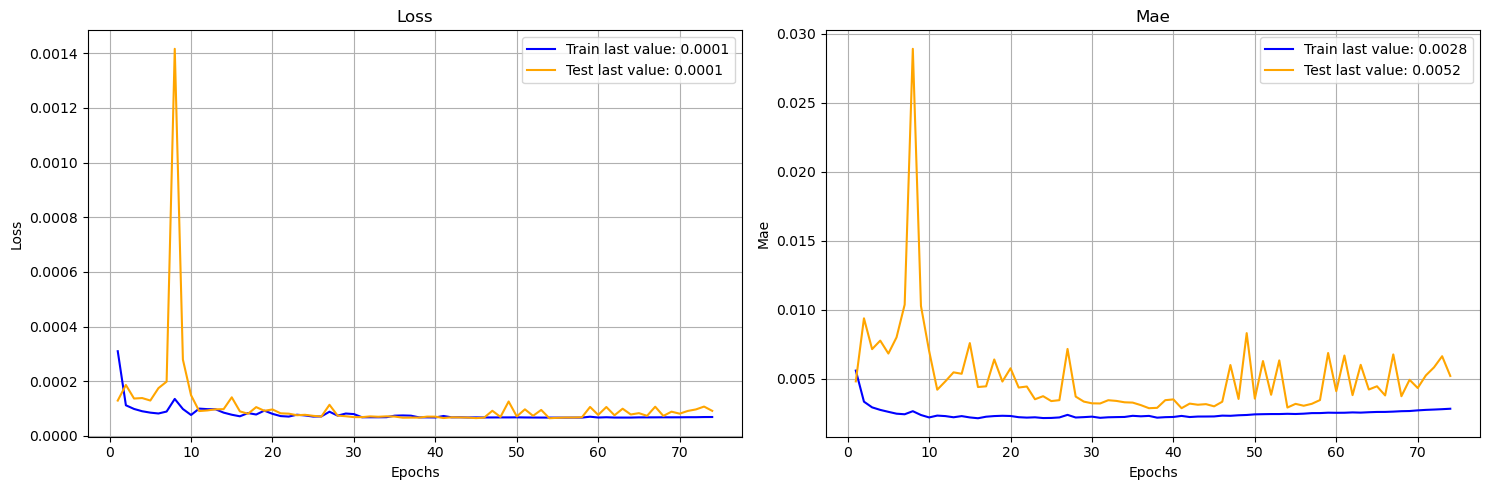

In [458]:
plot_training_history(history3)

In [350]:
model3.save('lstm_model4.h5')

In [397]:
# Evaluating the model on the test data
loss3 = model3.evaluate(X_test3, y_test3)

# Printing the loss (MSE, by default)
print(f"Mean Squared Error (MSE): {loss3}")


y_pred3 = model3.predict(X_test3)
rmse3 = math.sqrt(mean_squared_error(y_test3, y_pred3))
print(f"Root Mean Squared Error (RMSE): {rmse3}")
print('mse:', mean_squared_error(y_test3, y_pred3))
print('r2 score:', r2_score(y_test3, y_pred3))
print('mean absolute error:', mean_absolute_error(y_test3, y_pred3))


3129/3129 [==============================] - 22s 7ms/step - loss: 7.2138e-05 - mae: 0.0030
Mean Squared Error (MSE): [7.213753269752488e-05, 0.0030396056827157736]
3129/3129 [==============================] - 19s 6ms/step
Root Mean Squared Error (RMSE): 0.00849338298473569
mse: 7.2137555e-05
r2 score: 0.8916195439494744
mean absolute error: 0.003039605


In [381]:
u,v = create_sequences(df2.to_numpy(), 30)


In [382]:
# test the model on new data
y_pred3 = model3.predict(u)
rmse3 = math.sqrt(mean_squared_error(v, y_pred3))
print(f"Root Mean Squared Error (RMSE): {rmse3}")
print('mse:', mean_squared_error(v, y_pred3))
print('r2 score:', r2_score(v, y_pred3))


3128/3128 [==============================] - 19s 6ms/step
Root Mean Squared Error (RMSE): 0.009929424318370357
mse: 9.859346729424462e-05
r2 score: 0.8881028511289004


# **6-d- LSTM Sliding_Window(40)**

In [358]:
x,y=create_sequences(df_nr.to_numpy(), 40)

# y.shape,x.shape

x.shape,y.shape

((1000960, 40, 6), (1000960,))

In [359]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.2, shuffle=False)

X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape


X_test4, X_val4, y_test4, y_val4 = train_test_split(X_test4, y_test4, test_size=0.5, shuffle=False)

X_train4.shape, X_test4.shape, X_val4.shape, y_train4.shape, y_test4.shape, y_val4.shape

((800768, 40, 6),
 (100096, 40, 6),
 (100096, 40, 6),
 (800768,),
 (100096,),
 (100096,))

In [360]:
y_train4 = y_train4.reshape(y_train4.shape[0],1).astype('float32')
y_test4 = y_test4.reshape(y_test4.shape[0],1).astype('float32')
y_val4 = y_val4.reshape(y_val4.shape[0],1).astype('float32')
np.shape(y_train4), np.shape(y_test4), np.shape(y_val4)
y_val4.shape

(100096, 1)

In [362]:
from keras.callbacks import EarlyStopping

num_epochs = 100  # Increase the number of epochs
batch_size = 128  # Decrease the batch size
sequence_length = X_train4.shape[1]
input_dim = X_train4.shape[2]
output_dim = 1

model4 = Sequential()
model4.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, input_dim)))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model4.add(LSTM(256, return_sequences=False))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model4.add(Dense(output_dim))

model4.add(Activation("tanh"))  # Change activation function

# Add early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', restore_best_weights=True)

optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer2 = tf.keras.optimizers.Adam(0.001)

model4.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
model4.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_160 (LSTM)             (None, 40, 128)           69120     
                                                                 
 lstm_161 (LSTM)             (None, 256)               394240    
                                                                 
 dense_79 (Dense)            (None, 1)                 257       
                                                                 
 activation_75 (Activation)  (None, 1)                 0         
                                                                 
Total params: 463,617
Trainable params: 463,617
Non-trainable params: 0
_________________________________________________________________


In [363]:
start4 = time.time()
history4 = model4.fit(X_train4, y_train4, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val4, y_val4), callbacks=[es], shuffle=False)
end4 = time.time()

Epoch 1/100
6256/6256 [==============================] - 211s 29ms/step - loss: 3.1787e-04 - mae: 0.0057 - val_loss: 1.3357e-04 - val_mae: 0.0050
Epoch 2/100
6256/6256 [==============================] - 144s 23ms/step - loss: 1.1418e-04 - mae: 0.0035 - val_loss: 9.0052e-05 - val_mae: 0.0033
Epoch 3/100
6256/6256 [==============================] - 160s 26ms/step - loss: 1.3548e-04 - mae: 0.0031 - val_loss: 7.7885e-05 - val_mae: 0.0029
Epoch 4/100
6256/6256 [==============================] - 155s 25ms/step - loss: 9.4882e-05 - mae: 0.0028 - val_loss: 7.1086e-05 - val_mae: 0.0026
Epoch 5/100
6256/6256 [==============================] - 138s 22ms/step - loss: 8.9418e-05 - mae: 0.0026 - val_loss: 7.4014e-05 - val_mae: 0.0030
Epoch 6/100
6256/6256 [==============================] - 143s 23ms/step - loss: 1.3704e-04 - mae: 0.0026 - val_loss: 8.5687e-05 - val_mae: 0.0045
Epoch 7/100
6256/6256 [==============================] - 124s 20ms/step - loss: 2.1463e-04 - mae: 0.0028 - val_loss: 8.2203e

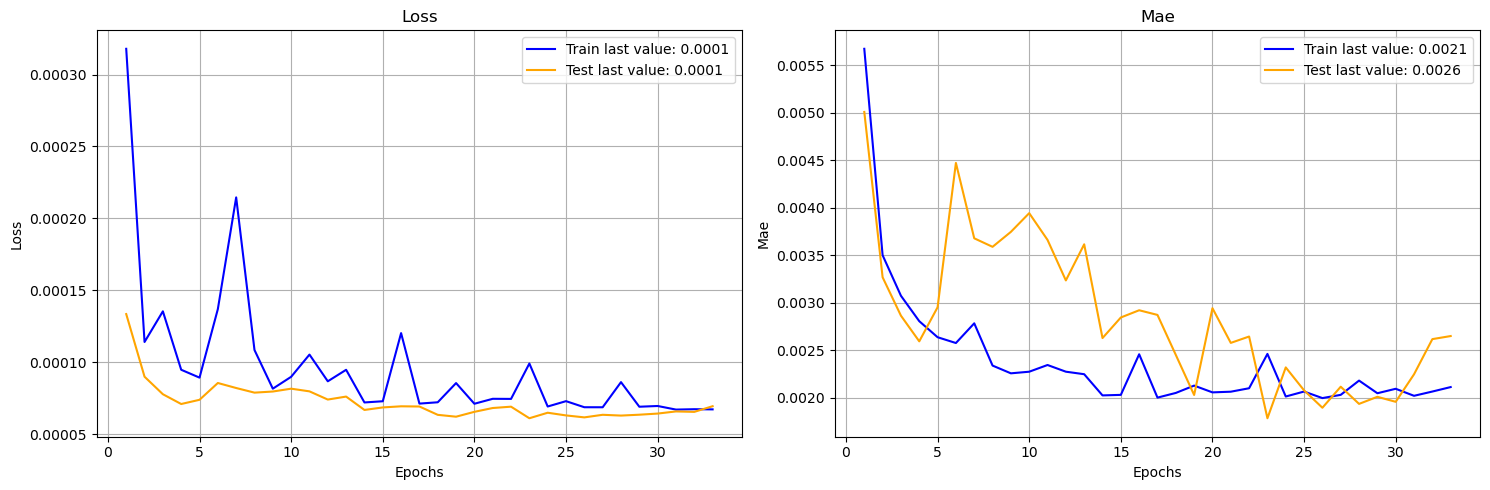

In [457]:
plot_training_history(history4)

In [364]:
model4.save('lstm_model5.h5')

In [398]:
# Evaluating the model on the test data
loss4 = model4.evaluate(X_test4, y_test4)

# Printing the loss (MSE, by default)
print(f"Mean Squared Error (MSE): {loss4}")

y_pred4 = model4.predict(X_test4)
rmse4 = math.sqrt(mean_squared_error(y_test4, y_pred4))
print(f"Root Mean Squared Error (RMSE): {rmse4}")
print('mse:', mean_squared_error(y_test4, y_pred4))
print('r2 score:', r2_score(y_test4, y_pred4))
print('mean absolute error:', mean_absolute_error(y_test4, y_pred4))

3128/3128 [==============================] - 25s 8ms/step - loss: 6.8611e-05 - mae: 0.0017
Mean Squared Error (MSE): [6.861098518129438e-05, 0.0017434366745874286]
3128/3128 [==============================] - 21s 7ms/step
Root Mean Squared Error (RMSE): 0.008283169554572875
mse: 6.86109e-05
r2 score: 0.8969271415334795
mean absolute error: 0.0017434369


In [383]:
u,v = create_sequences(df2.to_numpy(), 40)

In [384]:
y_pred4 = model4.predict(u)
rmse4 = math.sqrt(mean_squared_error(v, y_pred4))
print(f"Root Mean Squared Error (RMSE): {rmse4}")
print('mse:', mean_squared_error(v, y_pred4))
print('r2 score:', r2_score(v, y_pred4))
print('mean absolute error:', mean_absolute_error(v, y_pred4))

3127/3127 [==============================] - 23s 7ms/step
Root Mean Squared Error (RMSE): 0.009305111402374404
mse: 8.658509821059814e-05
r2 score: 0.9017406539844399
mean absolute error: 0.004618549014833769


# **6-e- LSTM Sliding_Window(50)**

In [371]:
x,y=create_sequences(df_nr.to_numpy(), 50)

# y.shape,x.shape

x.shape,y.shape

((1000950, 50, 6), (1000950,))

In [372]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.2, shuffle=False)

X_train5.shape, X_test5.shape, y_train5.shape, y_test5.shape


X_test5, X_val5, y_test5, y_val5 = train_test_split(X_test5, y_test5, test_size=0.5, shuffle=False)

X_train5.shape, X_test5.shape, X_val5.shape, y_train5.shape, y_test5.shape, y_val5.shape

((800760, 50, 6),
 (100095, 50, 6),
 (100095, 50, 6),
 (800760,),
 (100095,),
 (100095,))

In [373]:
y_train5 = y_train5.reshape(y_train5.shape[0],1).astype('float32')
y_test5 = y_test5.reshape(y_test5.shape[0],1).astype('float32')
y_val5 = y_val5.reshape(y_val5.shape[0],1).astype('float32')
np.shape(y_train5), np.shape(y_test5), np.shape(y_val5)
y_val5.shape

(100095, 1)

In [374]:
from keras.callbacks import EarlyStopping

num_epochs = 100  # Increase the number of epochs
batch_size = 128  # Decrease the batch size
sequence_length = X_train5.shape[1]
input_dim = X_train5.shape[2]
output_dim = 1

model5 = Sequential()
model5.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, input_dim)))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model5.add(LSTM(256, return_sequences=False))  # Increase the number of neurons
# model.add(Dropout(0.2))  # Add dropout layer

model5.add(Dense(output_dim))

model5.add(Activation("tanh"))  # Change activation function

# Add early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', restore_best_weights=True)

optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer2 = tf.keras.optimizers.Adam(0.001)

model5.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
model5.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_162 (LSTM)             (None, 50, 128)           69120     
                                                                 
 lstm_163 (LSTM)             (None, 256)               394240    
                                                                 
 dense_80 (Dense)            (None, 1)                 257       
                                                                 
 activation_76 (Activation)  (None, 1)                 0         
                                                                 
Total params: 463,617
Trainable params: 463,617
Non-trainable params: 0
_________________________________________________________________


In [375]:
start5 = time.time()
history5 = model5.fit(X_train5, y_train5, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val5, y_val5), callbacks=[es], shuffle=False)
end5 = time.time()

Epoch 1/100
6256/6256 [==============================] - 206s 30ms/step - loss: 3.1260e-04 - mae: 0.0058 - val_loss: 1.3285e-04 - val_mae: 0.0050
Epoch 2/100
6256/6256 [==============================] - 140s 22ms/step - loss: 1.1733e-04 - mae: 0.0036 - val_loss: 1.2395e-04 - val_mae: 0.0035
Epoch 3/100
6256/6256 [==============================] - 154s 25ms/step - loss: 1.4350e-04 - mae: 0.0034 - val_loss: 7.2260e-05 - val_mae: 0.0024
Epoch 4/100
6256/6256 [==============================] - 152s 24ms/step - loss: 1.1771e-04 - mae: 0.0032 - val_loss: 7.1264e-05 - val_mae: 0.0024
Epoch 5/100
6256/6256 [==============================] - 148s 24ms/step - loss: 1.2709e-04 - mae: 0.0030 - val_loss: 6.8374e-05 - val_mae: 0.0022
Epoch 6/100
6256/6256 [==============================] - 162s 26ms/step - loss: 1.1124e-04 - mae: 0.0027 - val_loss: 8.1711e-05 - val_mae: 0.0035
Epoch 7/100
6256/6256 [==============================] - 171s 27ms/step - loss: 1.3981e-04 - mae: 0.0027 - val_loss: 7.3362e

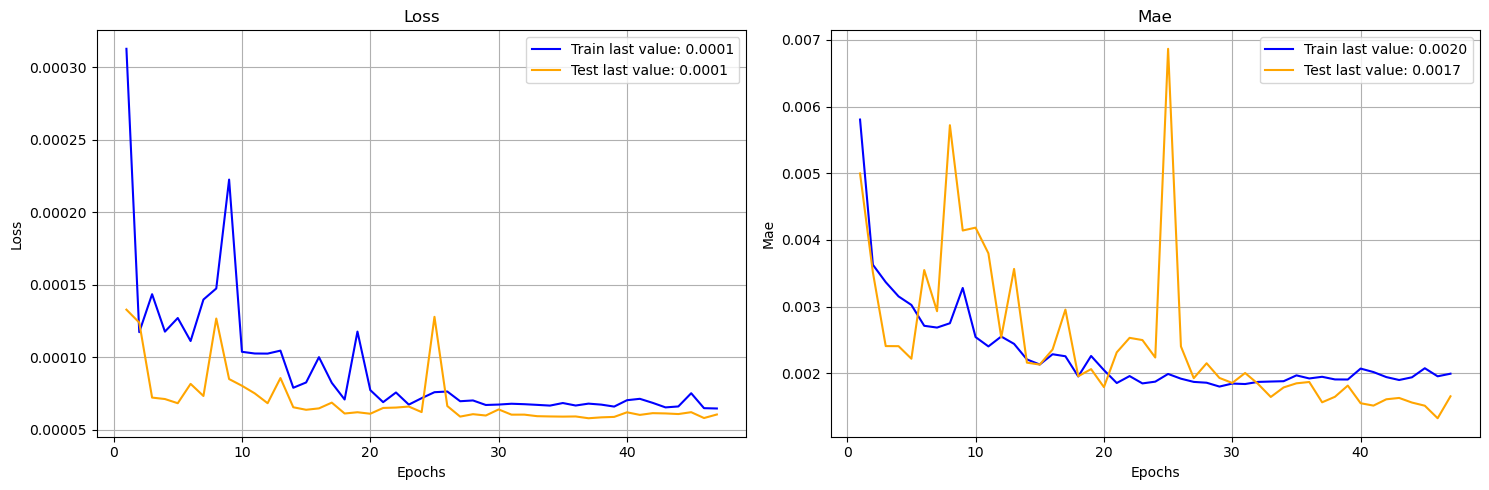

In [456]:
plot_training_history(history5)

In [377]:
model5.save('lstm_model6.h5')

In [399]:
# Evaluating the model on the test data
loss5 = model5.evaluate(X_test5, y_test5)

# Printing the loss (MSE, by default)
print(f"Mean Squared Error (MSE): {loss5}")

y_pred5 = model5.predict(X_test5)
rmse5 = math.sqrt(mean_squared_error(y_test5, y_pred5))
print(f"Root Mean Squared Error (RMSE): {rmse5}")
print('mse:', mean_squared_error(y_test5, y_pred5))
print('r2 score:', r2_score(y_test5, y_pred5))
print('mean absolute error:', mean_absolute_error(y_test5, y_pred5))

3128/3128 [==============================] - 28s 9ms/step - loss: 6.4511e-05 - mae: 0.0015
Mean Squared Error (MSE): [6.451065564760938e-05, 0.0015218275366351008]
3128/3128 [==============================] - 23s 7ms/step
Root Mean Squared Error (RMSE): 0.008031849848687642
mse: 6.451061e-05
r2 score: 0.9030900984038911
mean absolute error: 0.0015218284


In [387]:
loss[0]

6.904528709128499e-05

In [385]:
u,v = create_sequences(df2.to_numpy(), 50)

In [386]:
y_pred5 = model5.predict(u)
rmse5 = math.sqrt(mean_squared_error(v, y_pred5))
print(f"Root Mean Squared Error (RMSE): {rmse5}")
print('mse:', mean_squared_error(v, y_pred5))
print('r2 score:', r2_score(v, y_pred5))
print('mean absolute error:', mean_absolute_error(v, y_pred5))
    

3127/3127 [==============================] - 26s 8ms/step
Root Mean Squared Error (RMSE): 0.009277534670605075
mse: 8.607264956427922e-05
r2 score: 0.9023314704644267
mean absolute error: 0.00458357482333469


In [391]:
r2_score(y_test, y_pred)

0.8958141719290127

In [394]:
r2_score(y_test2, y_pred2)

0.8950710498924481

In [423]:
# collect the time taken to train the models
time_taken = [end-start, end2-start2, end3-start3, end4-start4, end5-start5]
# names = ['model1', 'model2', 'model3', 'model4', 'model5']
names = ['model_lstm_10', 'model_lstm_20', 'model_lstm_30', 'model_lstm_40', 'model_lstm_50']
sequence_length = [10, 20, 30, 40, 50]
rmse = [rmse, rmse2, rmse3, rmse4, rmse5]
mse = [loss[0], loss2[0], loss3[0], loss4[0], loss5[0]]
mae = [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test2, y_pred2), mean_absolute_error(y_test3, y_pred3), mean_absolute_error(y_test4, y_pred4), mean_absolute_error(y_test5, y_pred5)]
r2 = [r2_score(y_test, y_pred), r2_score(y_test2, y_pred2), r2_score(y_test3, y_pred3), r2_score(y_test4, y_pred4), r2_score(y_test5, y_pred5)]

time_df = pd.DataFrame({'model': names, 'sequence_length': sequence_length, 'time_taken': time_taken})
results_df = pd.DataFrame({'model': names, 'sequence_length': sequence_length, 'rmse': rmse, 'mse': mse, 'r2': r2, 'mae': mae})


time_df.to_csv('time_taken.csv', index=False)
results_df.to_csv('results.csv', index=False)

In [424]:
time_df

,model,sequence_length,time_taken
0,model_lstm_10,10,2159.527129
1,model_lstm_20,20,4206.219567
2,model_lstm_30,30,8104.367627
3,model_lstm_40,40,4786.798020
4,model_lstm_50,50,7457.881745


In [425]:
results_df

,model,sequence_length,rmse,mse,r2,mae
0,model_lstm_10,10,0.008309,0.000069,0.895814,0.002154
1,model_lstm_20,20,0.008355,0.000070,0.895071,0.002474
2,model_lstm_30,30,0.008493,0.000072,0.891620,0.003040
3,model_lstm_40,40,0.008283,0.000069,0.896927,0.001743
4,model_lstm_50,50,0.008032,0.000065,0.903090,0.001522


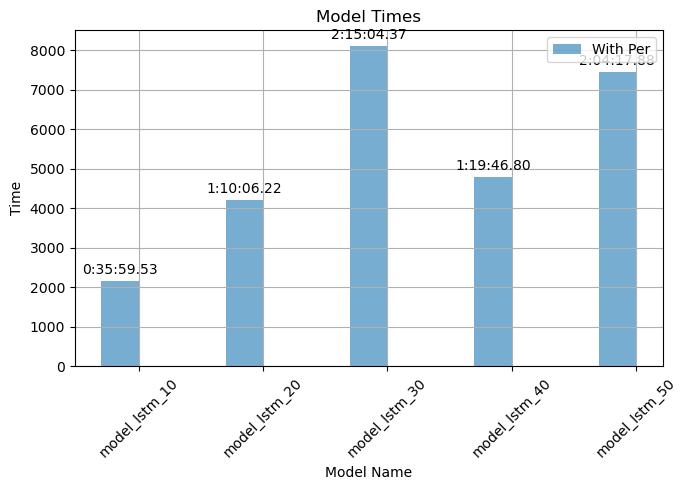

In [426]:
def plot_model_times(time_Per):
    x = np.arange(len(time_Per['model']))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(1, figsize=(7, 5))  # 1 row, 1 column

    # Function to add value annotations on top of the bars
    def annotate_bars(rects, ax):
        for rect in rects:
            height = rect.get_height()
            hours, remainder = divmod(height, 3600)
            minutes, seconds = divmod(remainder, 60)
            ax.annotate('{}:{:02d}:{:05.2f}'.format(int(hours), int(minutes), seconds),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # First plot
    rects1 = ax.bar(x - width/2, time_Per['time_taken'], width, label='With Per', alpha=0.6)
    ax.set_xlabel('Model Name')
    ax.set_ylabel('Time')
    ax.set_title('Model Times')
    ax.set_xticks(x)
    ax.set_xticklabels(time_Per['model'], rotation=45)
    ax.legend()
    ax.grid(True)
    annotate_bars(rects1, ax)  # Add value annotations for 'With Per'

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_model_times(time_df)

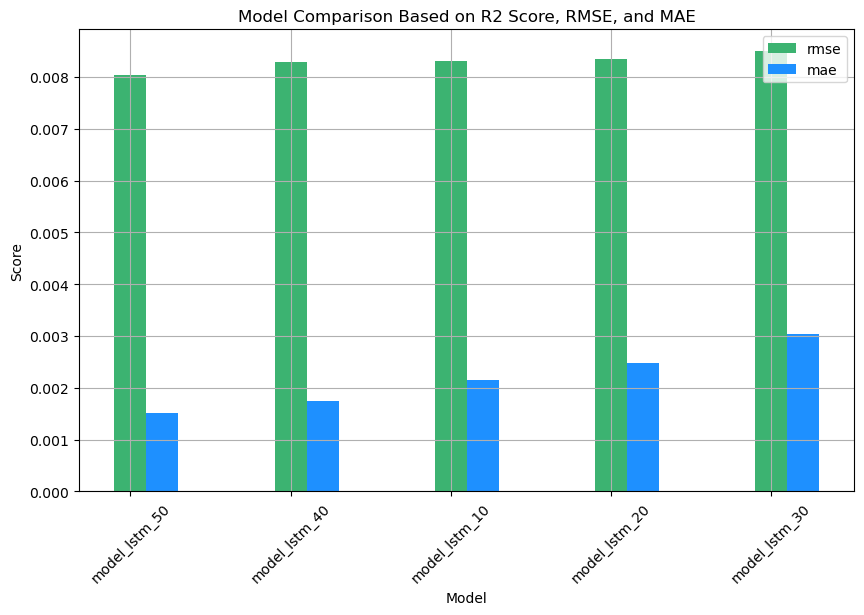

In [435]:
# Model Comparison Based on R2 Score, MSE, and MAE without previous errors (e_1, e_2, e_3)
results_df.sort_values('rmse', ascending=True, inplace=True)

# Define the width of the bars
width = 0.2

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(results_df['model']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Plot each bar at its respective position with new colors
# plt.bar(r1, results_df['r2'], color='tomato', width=width, label='r2_score')
plt.bar(r2, results_df['rmse'], color='mediumseagreen', width=width, label='rmse')
plt.bar(r3, results_df['mae'], color='dodgerblue', width=width, label='mae')
plt.grid(True)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on R2 Score, RMSE, and MAE')

# Add the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(results_df['model']))], results_df['model'], rotation=45)

plt.legend()
plt.show()

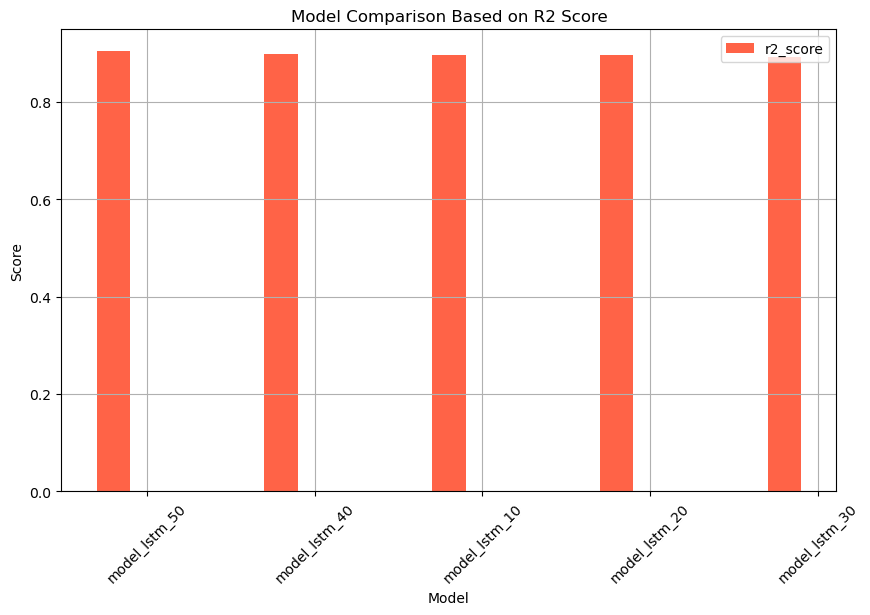

In [434]:
# Model Comparison Based on R2 Score, MSE, and MAE without previous errors (e_1, e_2, e_3)
results_df.sort_values('r2', ascending=False, inplace=True)

# Define the width of the bars
width = 0.2

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(results_df['model']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Plot each bar at its respective position with new colors
plt.bar(r1, results_df['r2'], color='tomato', width=width, label='r2_score')
plt.grid(True)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on R2 Score')

# Add the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(results_df['model']))], results_df['model'], rotation=45)

plt.legend()
plt.show()

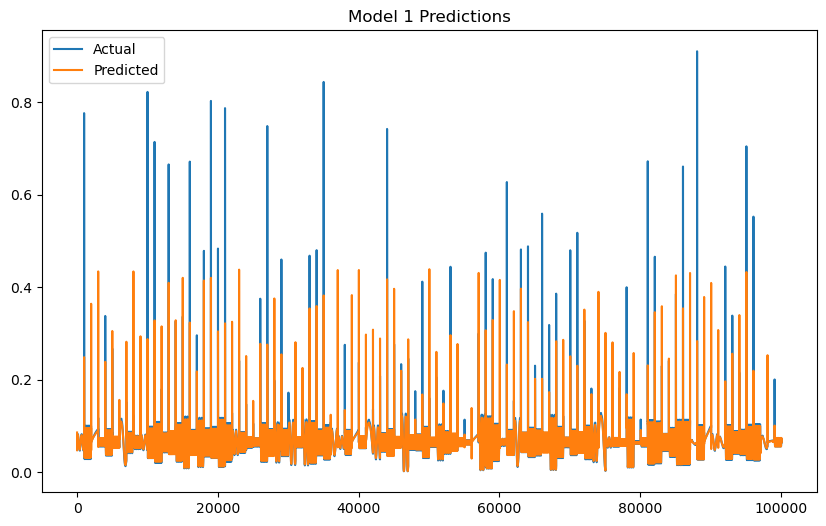

In [432]:
# a function to plot graphs of the model predictions and actual values
def plot_model_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

plot_model_predictions(y_test, y_pred, 'Model 1 Predictions')

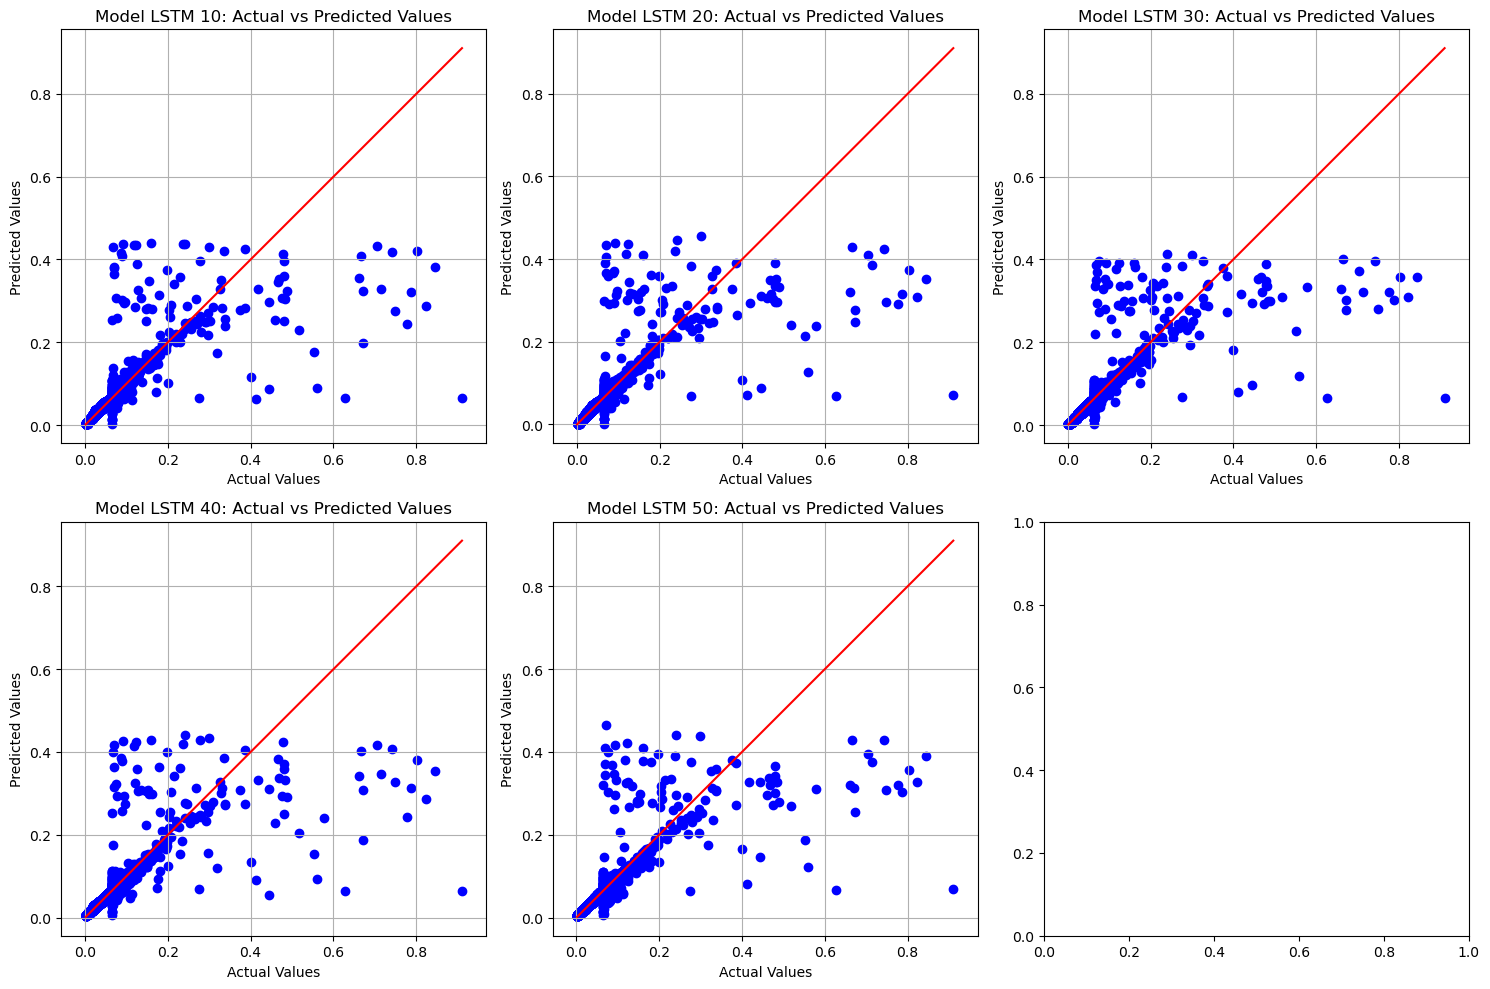

In [444]:
def plot_predictions(predictions):
    num_plots = len(predictions)
    num_rows = 2
    num_cols = (num_plots + 2) // num_rows
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))  # num_rows rows, num_cols columns

    axs = axs.flatten()  # Flatten the array to easily iterate over it

    for i, (y, y_pred) in enumerate(predictions):
        axs[i].scatter(y, y_pred, color='blue')
        p1 = max(max(y_pred), max(y))
        p2 = min(min(y_pred), min(y))
        axs[i].plot([p1, p2], [p1, p2], 'red')
        axs[i].grid(True)
        axs[i].set_xlabel('Actual Values')
        axs[i].set_ylabel('Predicted Values')
        axs[i].set_title(f'Model LSTM {i+1}0: Actual vs Predicted Values')
        axs[i].axis('equal')

    plt.tight_layout()
    plt.show()


# Calling the function with the data
# predictions is a list of tuples where each tuple is (y, y_pred) for each model
predictions = [(y_test, y_pred), (y_test2, y_pred2), (y_test3, y_pred3), (y_test4, y_pred4), (y_test5, y_pred5)]
plot_predictions(predictions)

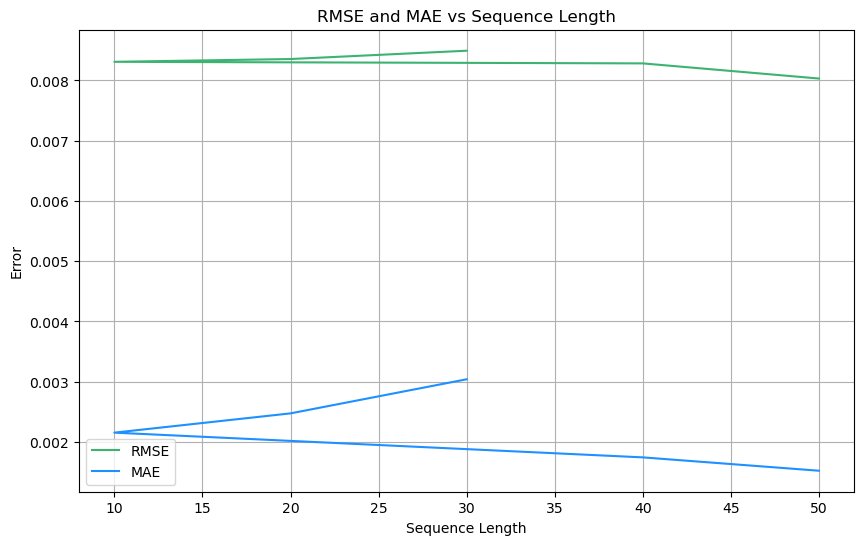

In [503]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['sequence_length'], results_df['rmse'], label='RMSE', color='mediumseagreen')
plt.plot(results_df['sequence_length'], results_df['mae'], label='MAE', color='dodgerblue')
plt.title('RMSE and MAE vs Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.show()

In [485]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
tar = scaler2.fit_transform(target.values.reshape(-1, 1))
# tar = tar.reshape(-1)
# tar = tar.flatten()
tar.shape
# scaler2.inverse_transform(tar)


(1001000, 1)

In [488]:
newpred = scaler2.inverse_transform(y_pred)
newtest = scaler2.inverse_transform(y_test)

In [489]:
newpred.shape, newtest.shape

((100099, 1), (100099, 1))

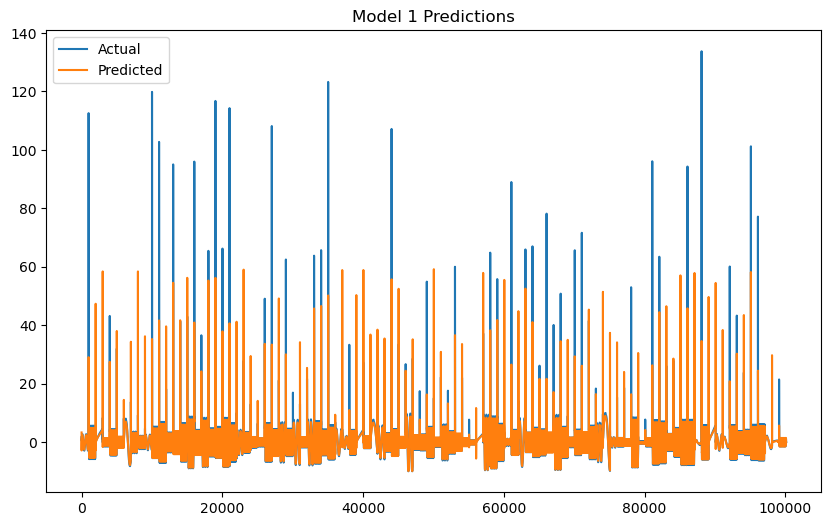

In [502]:
plt.figure(figsize=(10, 6))
plt.plot(newtest, label='Actual')
plt.plot(newpred, label='Predicted')
plt.title('Model 1 Predictions')
plt.legend()

plt.show()